In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir('/home/sebastiaan/PhD/Repositories/immune_response_detection/')

from statsmodels.stats.multitest import fdrcorrection
from parse_albert_seqs import parse_file
from raptcr.constants.parsing import parse_yfv_repertoires, parse_britanova_repertoires
from raptcr.indexing import FlatIndex
from raptcr.hashing import TCRDistEncoder
from raptcr.background import SyntheticBackground
from raptcr.neighbors import NeighborEnrichment
from raptcr.background import generate_olga_sequences_multi
from raptcr.neighbors import tcr_dict_to_df, index_neighbors
from raptcr.constants.preprocessing import adaptive_to_imgt_mouse
from raptcr.constants.parsing import _is_cdr3

Naive data

In [6]:
# Files
albert_data = "./data/albert/2102-Naive/"
files = [f for f in os.listdir(albert_data) if "donor" in f]
# Setup AA encoder
encoder = TCRDistEncoder(aa_dim=8,full_tcr=True,organism='mouse').fit()
# Analysis
results = {}
for f in files:
    # Read data
    filepath = os.path.join(albert_data,f)
    df = parse_file(filepath)
    # Generate background
    seq_gen = SyntheticBackground(repertoire=df,n=1,chain="B",organism="mouse")
    shuffled = seq_gen.shuffled_repertoire(factor=10)
    # Build background index
    index = FlatIndex(hasher=encoder)
    index.add(shuffled)
    # Run enrichment analysis
    neighbor_analysis = NeighborEnrichment(repertoire=df,hasher=encoder,radius=12.5)
    neighbor_analysis.compute_neighbors()
    neighbor_analysis.bg_index = index
    pvalues = neighbor_analysis.compute_pvalues(prefilter=False)
    pvalues["corrected_pval"] = fdrcorrection(pvalues.pval)[1]
    results[f] = (df.shape[0], pvalues)

reading: ./data/albert/2102-Naive/2102-T2-donorN2.tsv


/home/sebastiaan/PhD/Repositories/immune_response_detection/parse_albert_seqs.py:93: DtypeWarning: Columns (82,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fname)


parse_tcr_junctions: 0 20393
success_rate: 76.48
success_rate: 76.44
success_rate: 76.49
success_rate: 76.36
success_rate: 76.47
success_rate: 76.61
success_rate: 76.44
success_rate: 76.14
success_rate: 76.09
success_rate: 76.72



Using background of size 202275.
Computing neighbor counts in background for 10508 sequences.
Performing hypergeometric testing.
reading: ./data/albert/2102-Naive/2102-T2-donorN6.tsv


/home/sebastiaan/PhD/Repositories/immune_response_detection/parse_albert_seqs.py:93: DtypeWarning: Columns (82,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fname)


parse_tcr_junctions: 0 17948
success_rate: 76.48
success_rate: 76.64
success_rate: 76.78
success_rate: 76.46
success_rate: 76.40
success_rate: 76.44
success_rate: 76.43
success_rate: 76.98
success_rate: 76.66
success_rate: 76.81



Using background of size 177564.
Computing neighbor counts in background for 9292 sequences.
Performing hypergeometric testing.
reading: ./data/albert/2102-Naive/2102-T2-donorN3.tsv


/home/sebastiaan/PhD/Repositories/immune_response_detection/parse_albert_seqs.py:93: DtypeWarning: Columns (81,82,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fname)


parse_tcr_junctions: 0 19123
success_rate: 76.69
success_rate: 76.34
success_rate: 76.53
success_rate: 76.79
WARNING too_many_tries2: 191253
success_rate: 76.60
success_rate: 76.76
success_rate: 76.45
success_rate: 76.53
success_rate: 76.55
success_rate: 76.75



Using background of size 189570.
Computing neighbor counts in background for 9965 sequences.
Performing hypergeometric testing.
reading: ./data/albert/2102-Naive/2102-T2-donorN4.tsv


/home/sebastiaan/PhD/Repositories/immune_response_detection/parse_albert_seqs.py:93: DtypeWarning: Columns (82,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fname)


parse_tcr_junctions: 0 21857
success_rate: 75.80
success_rate: 75.99
success_rate: 75.85
WARNING too_many_tries2: 218650
success_rate: 75.77
success_rate: 75.95
success_rate: 75.82
success_rate: 75.82
success_rate: 76.07
success_rate: 75.80
success_rate: 75.80



Using background of size 215972.
Computing neighbor counts in background for 11504 sequences.
Performing hypergeometric testing.
reading: ./data/albert/2102-Naive/2102-T2-donorN5.tsv


/home/sebastiaan/PhD/Repositories/immune_response_detection/parse_albert_seqs.py:93: DtypeWarning: Columns (81,82,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fname)


parse_tcr_junctions: 0 18707
success_rate: 74.93
success_rate: 75.19
success_rate: 75.08
success_rate: 74.97
success_rate: 75.05
success_rate: 74.98
success_rate: 75.06
success_rate: 75.06
success_rate: 75.25
success_rate: 74.78



Using background of size 184725.
Computing neighbor counts in background for 9733 sequences.
Performing hypergeometric testing.
reading: ./data/albert/2102-Naive/2102-T2-donorN1.tsv


/home/sebastiaan/PhD/Repositories/immune_response_detection/parse_albert_seqs.py:93: DtypeWarning: Columns (81,82,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fname)


parse_tcr_junctions: 0 19559
success_rate: 76.43
success_rate: 76.54
success_rate: 76.38
success_rate: 76.71
success_rate: 76.73
success_rate: 76.49
success_rate: 76.44
success_rate: 76.44
success_rate: 76.72
WARNING too_many_tries2: 195648
success_rate: 76.69



Using background of size 193250.
Computing neighbor counts in background for 10017 sequences.
Performing hypergeometric testing.


In [28]:
sign_naive = [len(results[i][1][results[i][1].corrected_pval<.05]) / results[i][0] for i in results]
sign_naive

[0.00044132790663462955,
 5.571651437486071e-05,
 0.0,
 0.0021503408519009926,
 0.0006949270326615705,
 5.1127358249399256e-05]

Memory data

In [24]:
# Files
albert_data = "./data/albert/2102-Memory/"
files = [f for f in os.listdir(albert_data) if "donor" in f]
# Setup AA encoder
encoder = TCRDistEncoder(aa_dim=8,full_tcr=True,organism='mouse').fit()
# Analysis
results_memory = {}
for f in files:
    # Read data
    filepath = os.path.join(albert_data,f)
    df = parse_file(filepath)
    # Generate background
    seq_gen = SyntheticBackground(repertoire=df,n=1,chain="B",organism="mouse")
    shuffled = seq_gen.shuffled_repertoire(factor=10)
    # Build background index
    index = FlatIndex(hasher=encoder)
    index.add(shuffled)
    # Run enrichment analysis
    neighbor_analysis = NeighborEnrichment(repertoire=df,hasher=encoder,radius=12.5)
    neighbor_analysis.compute_neighbors()
    neighbor_analysis.bg_index = index
    pvalues = neighbor_analysis.compute_pvalues(prefilter=False)
    pvalues["corrected_pval"] = fdrcorrection(pvalues.pval)[1]
    results_memory[f] = (df.shape[0], pvalues)

reading: ./data/albert/2102-Memory/2102-T2-donorM1.tsv


/home/sebastiaan/PhD/Repositories/immune_response_detection/parse_albert_seqs.py:93: DtypeWarning: Columns (82,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fname)


parse_tcr_junctions: 0 23953
success_rate: 78.16
success_rate: 77.92
success_rate: 78.14
success_rate: 78.20
success_rate: 77.97
success_rate: 78.23
success_rate: 78.17
success_rate: 77.91
success_rate: 78.16
success_rate: 78.39



Using background of size 236757.
Computing neighbor counts in background for 10208 sequences.
Performing hypergeometric testing.
reading: ./data/albert/2102-Memory/2102-T2-donorM3.tsv


/home/sebastiaan/PhD/Repositories/immune_response_detection/parse_albert_seqs.py:93: DtypeWarning: Columns (82,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fname)


parse_tcr_junctions: 0 23615
success_rate: 78.36
success_rate: 78.15
success_rate: 78.19
success_rate: 77.98
success_rate: 78.29
success_rate: 78.15
success_rate: 78.04
success_rate: 78.30
success_rate: 78.25
success_rate: 78.12



Using background of size 233587.
Computing neighbor counts in background for 10125 sequences.
Performing hypergeometric testing.
reading: ./data/albert/2102-Memory/2102-T2-donorM2.tsv


/home/sebastiaan/PhD/Repositories/immune_response_detection/parse_albert_seqs.py:93: DtypeWarning: Columns (82,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fname)


parse_tcr_junctions: 0 23045
success_rate: 78.04
success_rate: 77.83
success_rate: 78.23
success_rate: 77.96
success_rate: 77.94
success_rate: 77.98
success_rate: 78.17
success_rate: 77.94
success_rate: 77.76
success_rate: 77.86



Using background of size 228305.
Computing neighbor counts in background for 9921 sequences.
Performing hypergeometric testing.
reading: ./data/albert/2102-Memory/2102-T2-donorM4.tsv


/home/sebastiaan/PhD/Repositories/immune_response_detection/parse_albert_seqs.py:93: DtypeWarning: Columns (82,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fname)


parse_tcr_junctions: 0 21369
success_rate: 77.79
success_rate: 77.66
success_rate: 77.83
success_rate: 77.91
success_rate: 77.60
success_rate: 77.89
success_rate: 77.78
success_rate: 77.78
success_rate: 77.66
success_rate: 77.67



Using background of size 211888.
Computing neighbor counts in background for 8877 sequences.
Performing hypergeometric testing.
reading: ./data/albert/2102-Memory/.~lock.2102-T2-donorM3.tsv#


AttributeError: 'DataFrame' object has no attribute 'frame_type'

In [29]:
sign_memory = [len(results_memory[i][1][results_memory[i][1].corrected_pval<.05]) / results_memory[i][0] for i in results_memory]
sign_memory

[0.0020874211998497057,
 0.0016514926953207706,
 0.0019527012367107832,
 0.0013103093265945996]

In [49]:
naive = {
    "repertoire" : list(results.keys()),
    "size" : [results[i][0] for i in results],
    "norm_hits" : sign_naive
}

mem = {
    "repertoire" : list(results_memory.keys()),
    "size" : [results_memory[i][0] for i in results_memory],
    "norm_hits" : sign_memory
}

naive, mem = (pd.DataFrame(naive), pd.DataFrame(mem))
naive["fraction"] = "naive"
mem["fraction"] = "memory"

final = pd.concat([naive,mem])
final

,repertoire,size,norm_hits,fraction
0,2102-T2-donorN2.tsv,20393,0.000441,naive
1,2102-T2-donorN6.tsv,17948,0.000056,naive
2,2102-T2-donorN3.tsv,19123,0.000000,naive
3,2102-T2-donorN4.tsv,21857,0.002150,naive
4,2102-T2-donorN5.tsv,18707,0.000695,naive
5,2102-T2-donorN1.tsv,19559,0.000051,naive
0,2102-T2-donorM1.tsv,23953,0.002087,memory
1,2102-T2-donorM3.tsv,23615,0.001651,memory
2,2102-T2-donorM2.tsv,23045,0.001953,memory
3,2102-T2-donorM4.tsv,21369,0.001310,memory


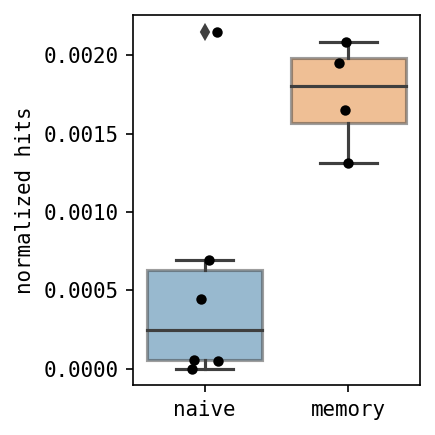

In [68]:
plt.rcParams["font.family"] = "monospace"
fig, ax = plt.subplots(dpi=150, figsize=(3,3))
sns.boxplot(x="fraction",y="norm_hits",data=final,boxprops=dict(alpha=.5),ax=ax)
sns.stripplot(x="fraction",y="norm_hits",c="black",data=final,ax=ax)
ax.set_xlabel("")
ax.set_ylabel("normalized hits")
fig.tight_layout()
fig.savefig("./fig/naive_vs_memory_hits_alberdata.png", format="png", dpi=500)

In [76]:
results_memory["2102-T2-donorM2.tsv"][1][results_memory["2102-T2-donorM2.tsv"][1].corrected_pval<.05]



,v_call,junction_aa,foreground_neighbors,background_neighbors,pval,corrected_pval
3431,TRBV20*01,CGVRDWGGSYEQYF,42,113,1.012965e-10,4.792842e-07
3113,TRBV20*01,CGARDWGGSYEQYF,42,113,1.012965e-10,4.792842e-07
3550,TRBV20*01,CGARDWGHSYEQYF,27,57,3.731847e-09,1.177149e-05
3176,TRBV20*01,CGARDWGASYEQYF,29,68,6.545554e-09,1.548514e-05
3502,TRBV20*01,CGARDWGVSYEQYF,22,44,4.815348e-08,9.113527e-05
3204,TRBV20*01,CGARDWGLSYEQYF,26,64,8.381818e-08,1.321952e-04
3134,TRBV20*01,CGARDWGSSYEQYF,28,85,9.017073e-07,1.218979e-03
3537,TRBV20*01,CGAQDWGNTGQLYF,9,7,2.867698e-06,2.980369e-03
3711,TRBV20*01,CGAWDWGNTGQLYF,9,7,2.867698e-06,2.980369e-03
3619,TRBV30*01,CSSRDRQYEQYF,13,20,3.149497e-06,2.980369e-03
